In [ ]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')


In [ ]:
df = web.DataReader('AMZN', data_source='yahoo',start='2015-01-01', end='2020-12-12')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,314.750000,306.959991,312.579987,308.519989,2783200,308.519989
2015-01-05,308.380005,300.850006,307.010010,302.190002,2774200,302.190002
2015-01-06,303.000000,292.380005,302.239990,295.290009,3519000,295.290009
2015-01-07,301.279999,295.329987,297.500000,298.420013,2640300,298.420013
2015-01-08,303.140015,296.109985,300.320007,300.459991,3088400,300.459991
...,...,...,...,...,...,...
2020-12-07,3180.760010,3141.689941,3156.479980,3158.000000,2751300,3158.000000
2020-12-08,3184.129883,3120.020020,3158.899902,3177.290039,3286300,3177.290039
2020-12-09,3174.429932,3088.000000,3167.889893,3104.199951,4100800,3104.199951


In [ ]:
#Get the number of rows and columns in the data set 
df.shape

(1498, 6)

Text(0, 0.5, 'Close Price USD ($)')

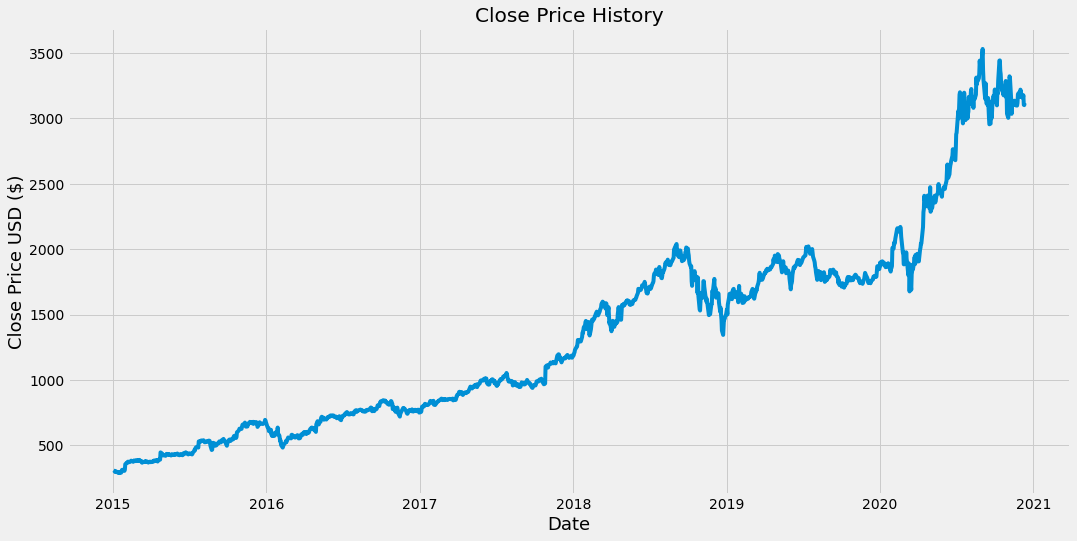

In [ ]:
#visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [ ]:
 #Create a new dataframe with only the 'Close' column
 data = df.filter(['Close'])
 #Convert the dataframe to a numpy array
 dataset = data.values
 #Get the number of rows to train the model on
 training_data_len = math.ceil( len(dataset) * .8 )
 training_data_len 

1199

In [ ]:
#Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00664817],
       [0.00469718],
       [0.0025705 ],
       ...,
       [0.86831561],
       [0.86748036],
       [0.87208197]])

In [ ]:
#Create the training dataset 
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets 
x_train = []
y_train = []
      
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00664817, 0.00469718, 0.0025705 , 0.00353521, 0.00416396,
       0.00307597, 0.00137463, 0.00240098, 0.0019479 , 0.        ,
       0.00116812, 0.00076745, 0.0031746 , 0.00720296, 0.00784096,
       0.00699954, 0.00610263, 0.00522731, 0.00765295, 0.02082909,
       0.02389274, 0.02360918, 0.02397904, 0.02679612, 0.02691632,
       0.02576976, 0.0265218 , 0.02718139, 0.02780706, 0.02924333,
       0.02727076, 0.02663584, 0.02837109, 0.02980736, 0.02872245,
       0.02824472, 0.03033441, 0.03015872, 0.02872862, 0.03042379,
       0.03010016, 0.02951764, 0.03109261, 0.02870704, 0.02823547,
       0.02544614, 0.02447834, 0.02690399, 0.02577592, 0.02662968,
       0.02618894, 0.02718139, 0.02659577, 0.02821389, 0.02717213,
       0.02685775, 0.02589304, 0.0247804 , 0.02576976, 0.02701186])]
[0.026244412235572875]



In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 
x_train.shape


(1139, 60, 1)

In [ ]:
#Build the LSTM Model 
model = Sequential()
model.add(LSTM(25, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(25, return_sequences=False))
model.add(Dense(23))
model.add(Dense(1))


In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1139/1139 [==============================] - 22s 20ms/step - loss: 8.2853e-04


In [ ]:
#Create the testing dataset
#Create a new array containing scaled values from index 1139 to 1498 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
   

In [ ]:
#Convert the data into a numpy array
x_test = np.array(x_test)


In [ ]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

52.10875035927049

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'Lower Right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


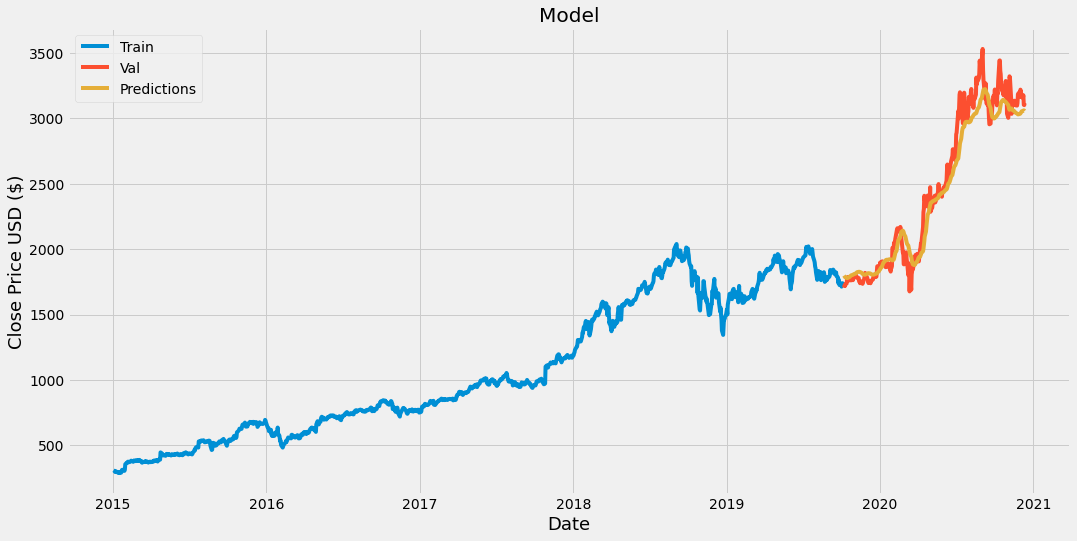

In [ ]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc ='Lower Right')
plt.show()

In [ ]:
#Show the valid and the predicted prices
valid

,Close,Predictions
Date,,
2019-10-08,1705.510010,1797.976929
2019-10-09,1721.989990,1792.508545
2019-10-10,1720.260010,1787.793945
2019-10-11,1731.920044,1783.628174
2019-10-14,1736.430054,1780.541504
...,...,...
2020-12-07,3158.000000,3057.785400
2020-12-08,3177.290039,3059.766602
2020-12-09,3104.199951,3061.722168


In [ ]:
predictions

array([[1797.9769],
       [1792.5085],
       [1787.794 ],
       [1783.6282],
       [1780.5415],
       [1778.472 ],
       [1778.5568],
       [1780.4385],
       [1783.8888],
       [1786.8788],
       [1790.8055],
       [1794.1775],
       [1796.9506],
       [1800.0363],
       [1802.2517],
       [1804.574 ],
       [1806.1559],
       [1808.0096],
       [1809.7488],
       [1812.0259],
       [1815.1125],
       [1818.446 ],
       [1821.5613],
       [1824.0793],
       [1826.0071],
       [1826.8154],
       [1827.17  ],
       [1826.0492],
       [1824.1434],
       [1821.0886],
       [1818.0293],
       [1815.0526],
       [1811.9408],
       [1808.415 ],
       [1805.2914],
       [1803.7885],
       [1804.3877],
       [1807.2897],
       [1810.7693],
       [1813.7103],
       [1815.6974],
       [1816.5603],
       [1815.7341],
       [1814.3634],
       [1812.5306],
       [1810.013 ],
       [1807.6072],
       [1805.8629],
       [1804.6322],
       [1804.1825],


In [ ]:
#Get the quote 
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and cpnvert the dataframe to an array 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1 
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list 
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[-14.41675]]


In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
